## Initial EDA Incident Data
---


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

#### Load data into DataFrames

In [5]:
incidents = pd.read_csv('./URSUS/URSUS_Incident_2016.csv')

In [6]:
incident_df = pd.DataFrame(incidents)

#### Inspect shape

In [8]:
incident_df.shape

(782, 16)

In [9]:
incident_df.head()

,Incident_ID,ORI,Incident_Date_Str,Incident_Time_Str,City,County,State,Zip_Code,Multiple_Locations,On_K12_Campus,Arrest_Made,Crime_Report_Filed,Contact_Reason,In_Custody_Reason,Num_Involved_Civilians,Num_Involved_Officers
0,URSUS-01-0000-2016-DWQ,CA0010000,7/3/2016,28,Hayward,Alameda County,CA,94544,False,False,True,True,Call for Service,NaN,1,2
1,URSUS-01-0000-2016-FEC,CA0010000,11/20/2016,2233,San Leandro,Alameda County,CA,94578,False,False,True,True,Call for Service,NaN,1,1
2,URSUS-01-0000-2016-MAJ,CA0010000,5/30/2016,1843,Dublin,Alameda County,CA,94568,False,False,True,True,Call for Service,NaN,1,2
3,URSUS-01-0000-2016-PCD,CA0010000,6/30/2016,2245,Dublin,Alameda County,CA,94568,False,False,True,True,In Custody Event,Booked - Awaiting Trial,1,2
4,URSUS-01-0000-2016-TMU,CA0010000,5/25/2016,1111,Hayward,Alameda County,CA,94545,False,False,True,True,Call for Service,NaN,1,1


In [10]:
incident_df = incident_df.drop(['ORI'], axis = 1)

### Check for and fill nulls/nans

In [12]:
incident_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 782 entries, 0 to 781
Data columns (total 15 columns):
Incident_ID               782 non-null object
Incident_Date_Str         782 non-null object
Incident_Time_Str         782 non-null int64
City                      782 non-null object
County                    782 non-null object
State                     782 non-null object
Zip_Code                  782 non-null int64
Multiple_Locations        782 non-null bool
On_K12_Campus             782 non-null bool
Arrest_Made               782 non-null bool
Crime_Report_Filed        782 non-null bool
Contact_Reason            782 non-null object
In_Custody_Reason         44 non-null object
Num_Involved_Civilians    782 non-null int64
Num_Involved_Officers     782 non-null int64
dtypes: bool(4), int64(4), object(7)
memory usage: 70.3+ KB


In [13]:
incident_df.isnull().sum()

Incident_ID                 0
Incident_Date_Str           0
Incident_Time_Str           0
City                        0
County                      0
State                       0
Zip_Code                    0
Multiple_Locations          0
On_K12_Campus               0
Arrest_Made                 0
Crime_Report_Filed          0
Contact_Reason              0
In_Custody_Reason         738
Num_Involved_Civilians      0
Num_Involved_Officers       0
dtype: int64

The only column with `Nan` values is the `In_Custody_Reason` column. The `Nan`'s in this case most likely mean that there is no information there given that nobody was put into custody. We can fill those `Nan` values with `na`.

In [14]:
mask = incident_df['In_Custody_Reason'].isnull()
incident_df['In_Custody_Reason'] = incident_df['In_Custody_Reason'].mask(mask, 'na')

In [15]:
incident_df.isnull().sum()

Incident_ID               0
Incident_Date_Str         0
Incident_Time_Str         0
City                      0
County                    0
State                     0
Zip_Code                  0
Multiple_Locations        0
On_K12_Campus             0
Arrest_Made               0
Crime_Report_Filed        0
Contact_Reason            0
In_Custody_Reason         0
Num_Involved_Civilians    0
Num_Involved_Officers     0
dtype: int64

### Category Types

In [17]:
incident_df.dtypes

Incident_ID               object
Incident_Date_Str         object
Incident_Time_Str          int64
City                      object
County                    object
State                     object
Zip_Code                   int64
Multiple_Locations          bool
On_K12_Campus               bool
Arrest_Made                 bool
Crime_Report_Filed          bool
Contact_Reason            object
In_Custody_Reason         object
Num_Involved_Civilians     int64
Num_Involved_Officers      int64
dtype: object

In [18]:
categorical_cols = ['City',
                    'County',
                    'Multiple_Locations',
                    'On_K12_Campus',
                    'Arrest_Made',
                    'Crime_Report_Filed',
                    'Contact_Reason',
                    'In_Custody_Reason']

In [28]:
incident_df['Incident_Date_Str'][0]

'7/3/2016'

In [31]:
incident_df['Incident_Date_Str'] = pd.to_datetime(incident_df['Incident_Date_Str'])

In [47]:
test = pd.to_datetime('2016-07-04')

In [48]:
test

Timestamp('2016-07-04 00:00:00')

In [37]:
incident_df['Month'] = [x.month for x in incident_df['Incident_Date_Str']]

In [54]:
incident_df['Weekday'] = [x.weekday() for x in incident_df['Incident_Date_Str']]

In [56]:
incident_df.to_pickle('./dataframes/incident_df.pkl')

### Visual EDA

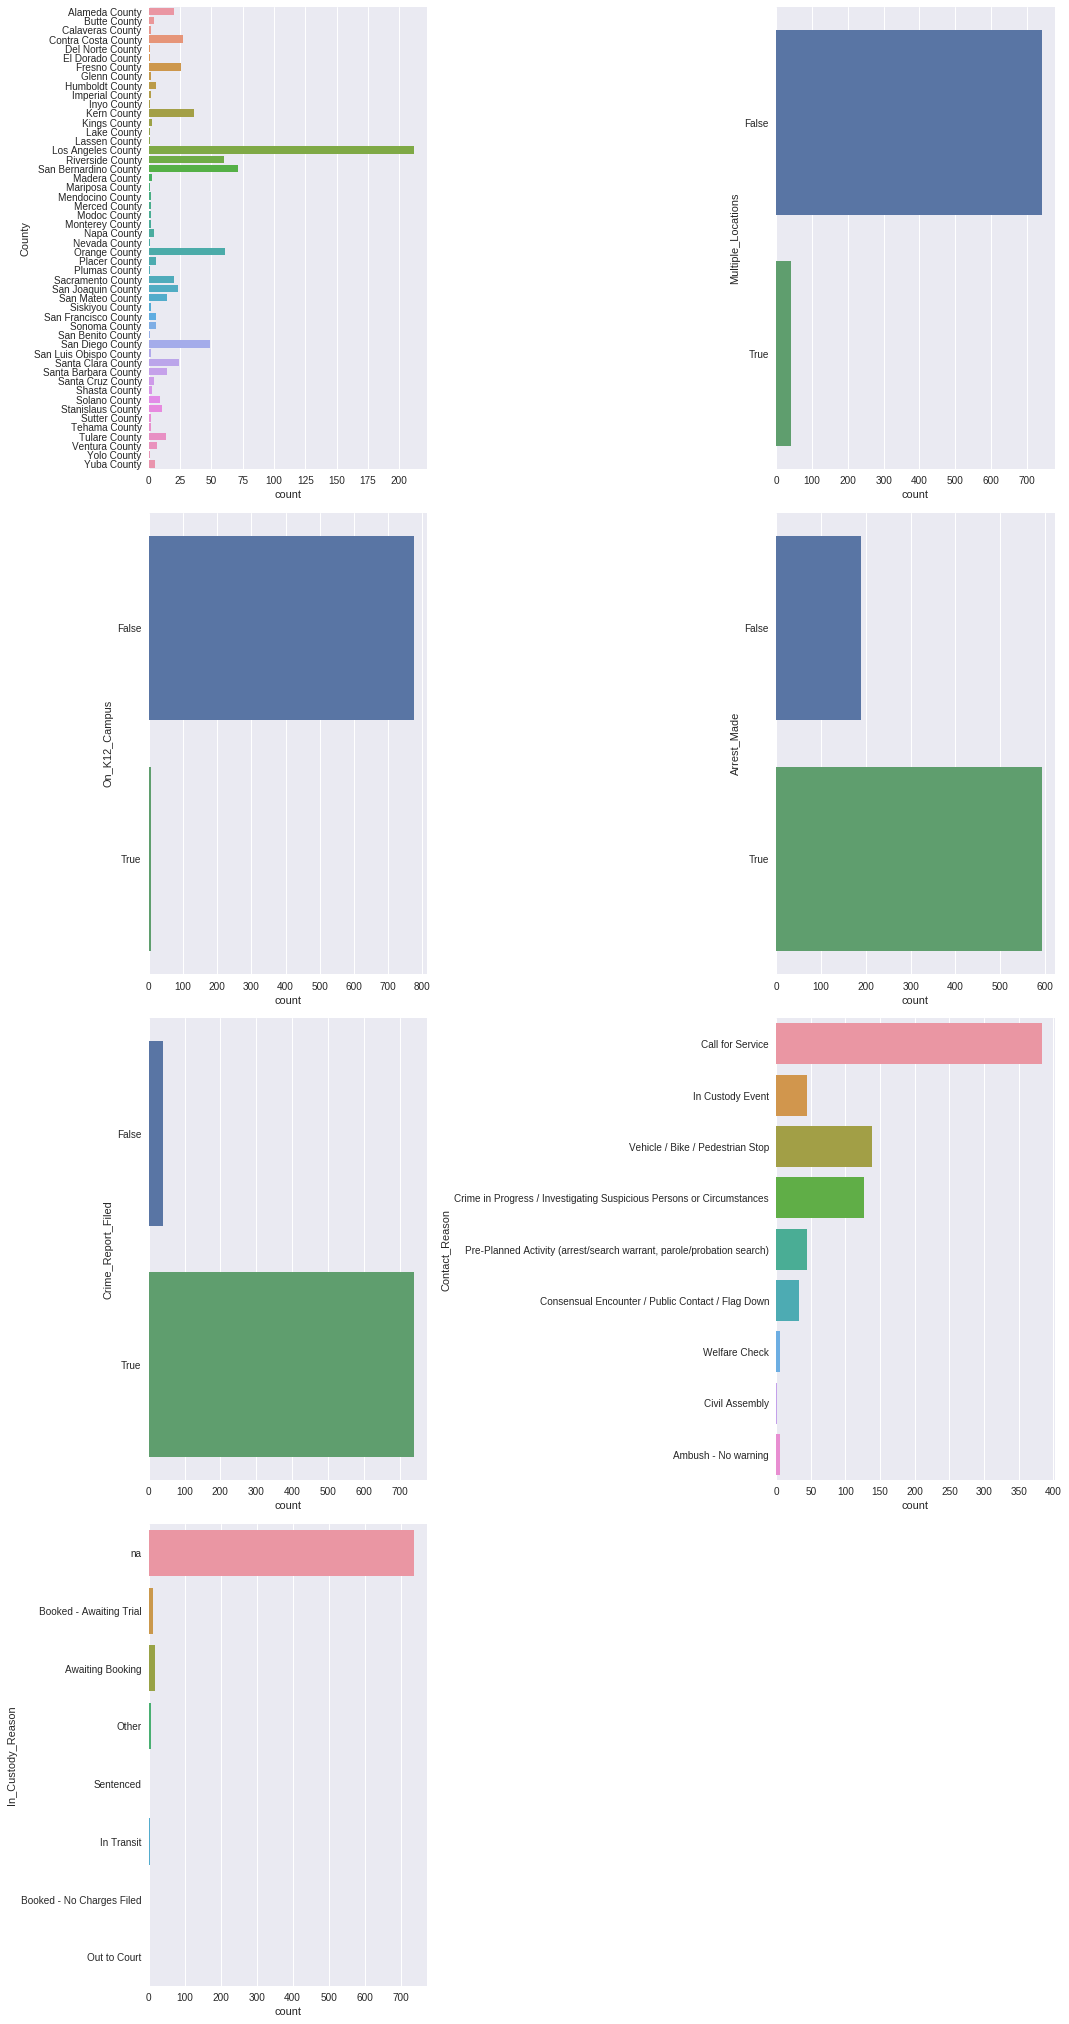

In [26]:
fig = plt.figure(figsize=(15,70))
for i, col in enumerate(categorical_cols[1:]):
    fig.add_subplot(10,2,i+1)
    sns.countplot(y=col,data=incident_df, orient='h')

fig.tight_layout()